# US Visa Granted or Denied

### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. 
The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## Problem statement.

* OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. 
* As in last year the count of employees was huge and OFLC wants to analyze important variables that can determine whether to grant or deny job certification applications.

## Objective

This project's main goal is to run a Chi-square test of independence to examine the relationship between categorical features and case status, the target variable. We use Python hypothesis testing and other analyses to extract useful information that can help OFLC grant or deny job certification applications. In particular, we want to test the correlation of Categorical columns with Target column

## Research Question

Is there a connection between continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, and full_time_position, and case_status since correlated features can help in prediction. Features that have some level of correlation or relationship with the target variable are generally more useful for prediction. If there is no relationship, the model may not perform well because the features won't provide helpful information to predict the target? 

## Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## Loading the data

In [19]:
df = pd.read_csv(r"Visadataset.csv")

In [20]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Exploratory Data Analysis

In [22]:
# rows and columns of the dataset
df.shape

(25480, 12)

**Check Datatypes in the dataset**

In [17]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are so many columns in the dataset, but as per our problem statement, we only require some fields from the original data. Rest columns are nothing but unwanted columns for this study. So we will simply filter the columns.

As the problem statement revolves around the **continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, and full_time_position, and case_status**, I will filter the data to have only those records.

**Define numerical & categorical columns**

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


**proportion of count data on categorical columns**

In [24]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Insights**
 - `case_id` have unique values for each column which can be dropped as it of no importance
 - `continent` column is highly biased towards asia.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Categorical Features

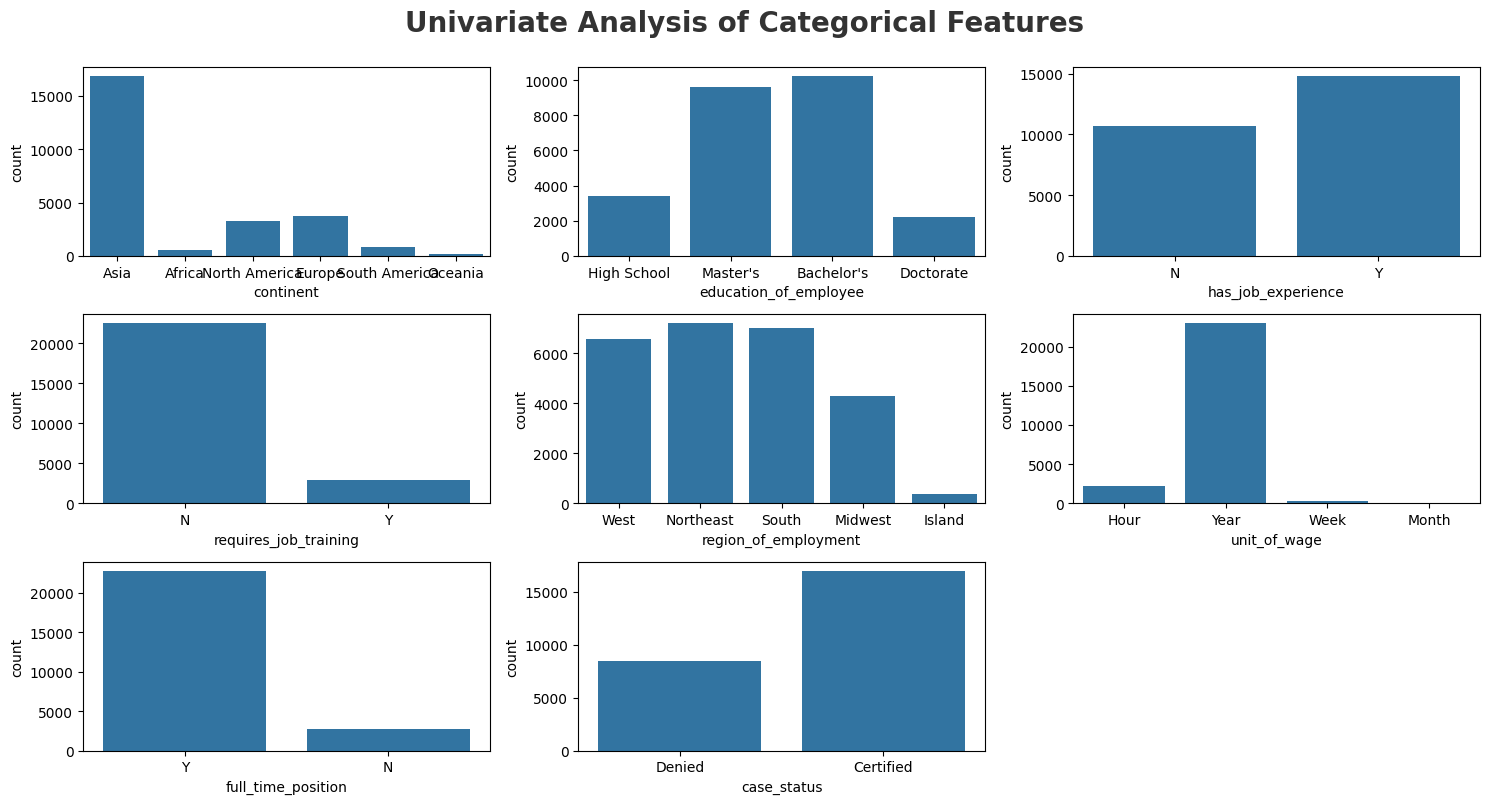

In [26]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

## **Insights**

From the uploaded **Univariate Analysis of Categorical Features** plots, you can infer the distribution of each categorical variable in your dataset. These visualizations give you insights into how different categories of each feature are represented. Here's a breakdown of what you can infer from each plot:

### 1. **Continent**:
   - The majority of the observations are from **Asia**, which dominates this category. Other continents like Africa, North America, Europe, South America, and Oceania have significantly fewer observations.
   - This suggests that most employees or applicants in your dataset are from Asia.

### 2. **Education of Employee**:
   - **Bachelor's** and **Master's** degrees make up the largest portions of the education level distribution, with fewer employees having a **High School** or **Doctorate** degree.
   - This indicates that the majority of individuals applying or in the dataset have relatively higher education levels (Bachelor's or Master's).

### 3. **Has Job Experience**:
   - A slightly larger proportion of employees **have job experience** (marked as "Y") compared to those without ("N").
   - This suggests that prior job experience is common among the employees or applicants in your data.

### 4. **Region of Employment**:
   - The **West**, **Northeast**, and **South** regions dominate the employment regions, while the **Midwest** and **Island** regions have relatively fewer entries.
   - This shows that the workforce or applicants are concentrated in these regions.

### 5. **Unit of Wage**:
   - The vast majority of the wages are given on a **yearly** basis, with very few instances of hourly, weekly, or monthly wage units.
   - This suggests that most employees or applicants are paid on an annual basis.

### 6. **Requires Job Training**:
   - Most employees do **not require job training** (N), and only a small portion requires it (Y).
   - This suggests that most of the jobs or applicants don’t need additional training.

### 7. **Full-time Position**:
   - Most of the positions are **full-time**, with very few part-time jobs represented in the dataset.
   - This indicates that the dataset is dominated by full-time positions.

### 8. **Case Status (Target Column)**:
   - A larger number of cases are **Certified** compared to those that are **Denied**.
   - This suggests that the majority of applications or cases in the dataset hgories in each feature are distributed.

## **Chi-Square Test**

**Chi-square test determines if there is a significant association between categorical features and a target column (with categories like "Denied" and "Certified").**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correlated)

In [31]:
from scipy.stats import chi2_contingency  

# Initialize an empty list to store the results of the Chi-square test for each categorical feature
chi2_test = []  

# Loop through each categorical feature in the dataset
for feature in categorical_features:
    
    # Create a contingency table using pd.crosstab to compare the 'case_status' (target column) with the current feature
    # pd.crosstab creates a frequency table of the two categorical variables (case_status and the feature)
    contingency_table = pd.crosstab(df['case_status'], df[feature])
    
    # Perform the Chi-square test on the contingency table using chi2_contingency.
    # chi2_contingency returns 4 values: chi2 statistic, p-value, degrees of freedom, and the expected frequencies.
    # We use `[1]` to extract the p-value.
    p_value = chi2_contingency(contingency_table)[1]
    
    # Check if the p-value is less than 0.05 (standard significance level)
    if p_value < 0.05:
        # If the p-value is less than 0.05, we reject the null hypothesis, meaning that the feature is likely associated with 'case_status'
        chi2_test.append('Reject Null Hypothesis')
    else:
        # If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, meaning that there is no significant association
        chi2_test.append('Fail to Reject Null Hypothesis')

# We pass the list of categorical features and the chi2_test results as rows, transposed (.T) to make them columns
result = pd.DataFrame(data=[categorical_features, chi2_test]).T

# Rename the columns of the DataFrame to 'Column' (for feature name) and 'Hypothesis Result' (for the test result)
result.columns = ['Column', 'Hypothesis Result']

# Display the resulting DataFrame
result


,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


## **Report**

The table summarizes the results of Chi-square tests conducted on various categorical features in relation to the target variable, `case_status`. 

### Table Explanation

1. **Columns**:
   - **Column**: This refers to the categorical feature that was tested for independence with the target variable `case_status`.
   - **Hypothesis Result**: This shows the outcome of the Chi-square test for each feature concerning the null hypothesis.

2. **Results**:
   - **Reject Null Hypothesis**: This outcome suggests that there is a statistically significant association between the feature and the target variable (`case_status`). In other words, the distribution of the target variable varies depending on the category of the feature.
   - **Fail to Reject Null Hypothesis**: This means there is no statistically significant evidence to suggest an association between the feature and the target variable. The feature does not significantly influence or relate to the distribution of the target variable.

### Interpretation of Each Row

- **`continent`**: The result indicates a significant relationship between `continent` and `case_status`, meaning that the status (Denied or Certified) is likely dependent on the continent from which the individual is.
  
- **`education_of_employee`**: Similar to `continent`, this feature shows a significant association with the target variable, suggesting that educational background may influence the outcome of `case_status`.

- **`has_job_experience`**: This feature also shows a significant relationship, indicating that whether an individual has job experience could affect their `case_status`.

- **`requires_job_training`**: The result shows "Fail to Reject Null Hypothesis," indicating no significant association with `case_status`. This suggests that the requirement for job training does not meaningfully affect the outcome.

- **`region_of_employment`**: This feature is significant, suggesting that the region where an individual is employed may influence their `case_status`.

- **`unit_of_wage`**: This feature also indicates a significant relationship with the `case_status`, implying that how wages are calculated might affect the outcome.

- **`full_time_position`**: The outcome here suggests a significant association, meaning whether an employee is in a full-time position can influence their `case_status`.

- **`case_status`**: While it may seem redundant to include `case_status` in this context, its inclusion here confirms that the variable is indeed significant to itself (which is a logical requirement).

### Overall Conclusion

The overall results suggest that several categorical features are significantly associated with the `case_status`, while only `requires_job_training` does not show a significant relationship. 

This implies that when predicting or analyzing `case_status`, the features `continent`, `education_of_employee`, `has_job_experience`, `region_of_employment`, `unit_of_wage`, and `full_time_position` should be considered as they might have a meaningful impact on the outcome. The results of this Chi-square test can guide further analysis and modeling efforts, as it highlights features worth focusing on for understandiation on any part, feel free to ask!

######################################################End-of-Code#####################################################